<a href="https://colab.research.google.com/github/Arslonbekjon/Certificate-exams/blob/main/Aviachipta_narxini_bashorat_qilish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ushbu maʼlumotlar toʻplami quyidagilarni o'z ichiga oladi:

Tarkib:

ID: Ketma - ketlik uchun qo'yilgan sonlar.

Airline: Parvoz qilingan aviakompaniya nomi.

Flight: Parvoz qilingan ID raqami.

Source_city: Parvoz qaysi shahardan boshlanishi.

Departure_time: Samolyotning ketish vaqti.

Stop: Parvoz davomida to'xtashlar soni.

Arrival_time: Qaytish vaqti.

Destination_city: Qaysi davlatga parvoz qilinayotgani.

Class: Foydalanuvchi samolyotning qaysi klass turidan foydalanib uchganligi.

Duration: Parvoz davomiyligi.

Days_left: Samolyotning qancha vaqtdan keyin qaytishi.

In [50]:
import zipfile

zf = zipfile.ZipFile('/content/aviachipta-narxini-bashorat-qilish.zip')
df = pd.read_csv(zf.open('train_data.csv'),index_col=0)
df_test = pd.read_csv(zf.open('test_data.csv'),index_col=0)
sample = pd.read_csv(zf.open('sample_solution.csv'),index_col=0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [3]:
print(df.shape)
print(df_test.shape)

(20000, 11)
(5000, 10)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           5000 non-null   object 
 1   flight            5000 non-null   object 
 2   source_city       5000 non-null   object 
 3   departure_time    5000 non-null   object 
 4   stops             5000 non-null   object 
 5   arrival_time      5000 non-null   object 
 6   destination_city  5000 non-null   object 
 7   class             5000 non-null   object 
 8   duration          5000 non-null   float64
 9   days_left         5000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 429.7+ KB


In [6]:
df.describe()

,duration,days_left,price
count,20000.000000,20000.000000,20000.000000
mean,12.177627,25.924150,20960.281700
std,7.157944,13.624874,22775.459535
min,0.830000,1.000000,1105.000000
25%,6.830000,14.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.080000,38.000000,42521.000000
max,38.580000,49.000000,114523.000000


In [7]:
df_test.describe()

,duration,days_left
count,5000.000000,5000.000000
mean,12.328838,26.015600
std,7.306348,13.692409
min,0.830000,1.000000
25%,6.830000,14.000000
50%,11.250000,26.000000
75%,16.250000,38.000000
max,40.670000,49.000000


In [8]:
df['flight'].value_counts()

UK-706     208
UK-720     190
UK-822     178
UK-836     169
UK-772     169
          ... 
6E-2471      1
6E-821       1
SG-1031      1
6E-759       1
6E-7201      1
Name: flight, Length: 1310, dtype: int64

In [9]:
df_test['flight'].value_counts()

UK-826     46
UK-706     46
UK-772     44
UK-860     43
UK-720     42
           ..
6E-7127     1
6E-7292     1
G8-2504     1
G8-506      1
6E-186      1
Name: flight, Length: 941, dtype: int64

In [10]:
col = df[['duration','days_left','price']]
col.corrwith(df['price'])

duration     0.213158
days_left   -0.102545
price        1.000000
dtype: float64

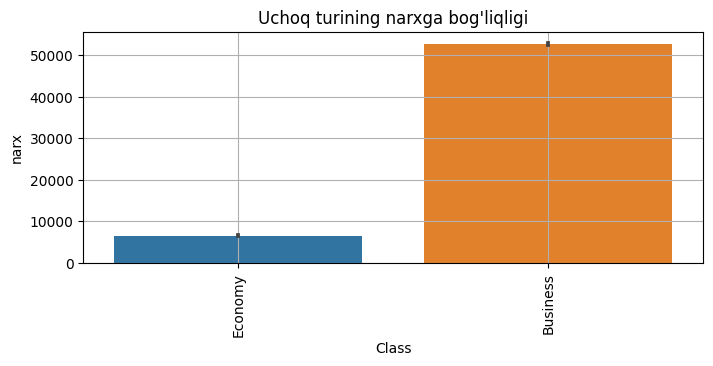

In [11]:
plt.figure(figsize=(8,3))
sns.barplot(x=df['class'] , y=df['price'])

plt.title("Uchoq turining narxga bog'liqligi")
plt.xlabel('Class')
plt.ylabel('narx')
plt.xticks(rotation=90)
plt.grid()
plt.show()

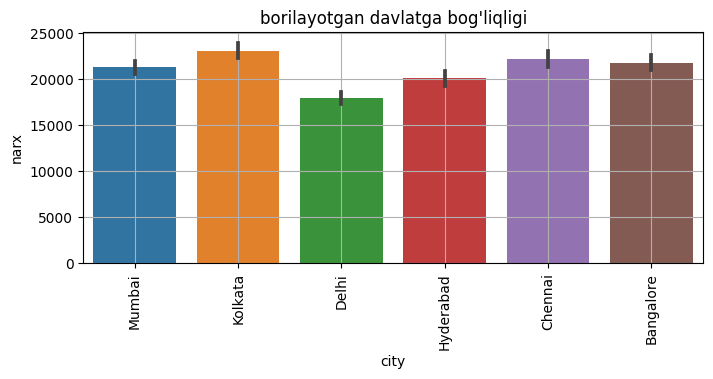

In [12]:
plt.figure(figsize=(8,3))
sns.barplot(x=df['destination_city'] , y=df['price'])

plt.title("borilayotgan davlatga bog'liqligi")
plt.xlabel('city')
plt.ylabel('narx')
plt.xticks(rotation=90)
plt.grid()
plt.show()

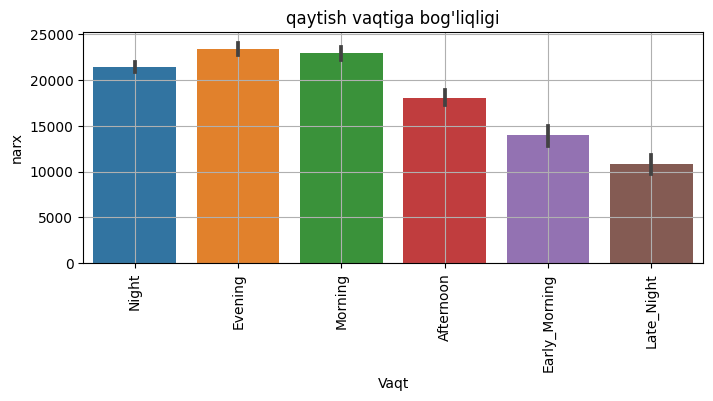

In [13]:
plt.figure(figsize=(8,3))
sns.barplot(x=df['arrival_time'] , y=df['price'])

plt.title("qaytish vaqtiga bog'liqligi")
plt.xlabel('Vaqt')
plt.ylabel('narx')
plt.xticks(rotation=90)
plt.grid()
plt.show()

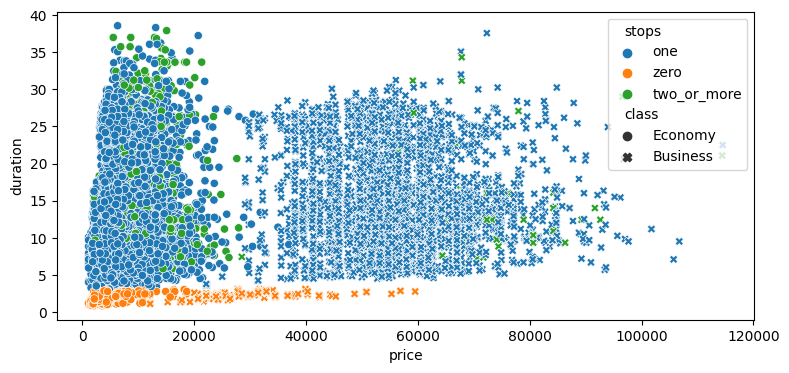

In [14]:
plt.figure(figsize=[9,4])
sns.scatterplot(df,x="price", y="duration", hue="stops", style="class")
plt.show()

In [15]:
diction = {"zero":0,"one":1,"two_or_more":2}
df['stops']=df['stops'].map(diction)
df_test['stops']=df_test['stops'].map(diction)

In [16]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,1,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,0,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,1,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,1,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,0,Morning,Mumbai,Economy,2.00,4,10712


In [17]:
df.shape
df_test.shape

(5000, 10)

In [18]:
df = pd.get_dummies(df)
df

,stops,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
id,,,,,,,,,,,,,,,,,,,,,
1,1,14.25,21,7212,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
2,0,1.75,7,5292,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
3,1,9.58,5,60553,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,1,6.75,28,5760,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
5,0,2.00,4,10712,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,1,7.92,45,3153,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
19997,1,5.83,24,3911,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
19998,2,35.33,17,14822,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [19]:
df.shape

(20000, 1346)

In [21]:
df_test = pd.get_dummies(df_test)

In [22]:
df_test.shape

(5000, 976)

In [23]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=49)

In [24]:
print(train_set.shape)
print(test_set.shape)

(16000, 1346)
(4000, 1346)


In [25]:
X_train = train_set.drop("price", axis=1)
y = train_set["price"].copy()

In [26]:
X_train

,stops,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,flight_6E-102,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
id,,,,,,,,,,,,,,,,,,,,,
9171,2,26.75,7,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
16804,1,4.00,41,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15859,1,7.17,6,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
6608,1,20.08,22,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1108,1,23.75,34,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8051,1,18.67,46,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
7925,1,27.08,25,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
19639,1,10.08,43,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [36]:
Cols = df.columns.intersection(df_test.columns)
X_train=X_train[Cols]
X_test=X_test[Cols]
df_test=df_test[Cols]

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
xprep = scaler.fit_transform(X_train)
xprep

array([[1.        , 0.68662252, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.08397351, 0.83333333, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.16794702, 0.10416667, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.5       , 0.24503311, 0.875     , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.4394702 , 0.29166667, ..., 1.        , 0.        ,
        1.        ],
       [0.5       , 0.27602649, 0.58333333, ..., 0.        , 1.        ,
        0.        ]])

In [31]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [32]:
LR_model.fit(xprep, y)

LinearRegression()

In [33]:
X_test = test_set.drop('price', axis=1)

X_test

,stops,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,flight_6E-102,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
id,,,,,,,,,,,,,,,,,,,,,
12226,1,14.25,38,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
18897,2,7.58,45,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
5355,1,4.50,21,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
6520,1,23.83,29,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,0
18069,1,14.50,26,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18128,1,6.58,44,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3351,1,16.33,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
12011,0,2.08,18,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [34]:
y_test = test_set['price'].copy()
y_test

id
12226     6363
18897     6548
5355      3835
6520     71117
18069     7304
         ...  
18128     3393
3351     58212
12011     2476
1201      6172
4279     67094
Name: price, Length: 4000, dtype: int64

In [37]:
xtprep = scaler.transform(X_test)
xtprep

array([[0.5       , 0.35549669, 0.77083333, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.17880795, 0.91666667, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.09721854, 0.41666667, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.03311258, 0.35416667, ..., 1.        , 0.        ,
        1.        ],
       [0.5       , 0.37748344, 0.70833333, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.19205298, 0.375     , ..., 0.        , 1.        ,
        0.        ]])

In [38]:
y_predict = LR_model.predict(xtprep)
y_predict

array([ 6640., 10720.,  9024., ..., -5104.,  4560., 55992.])

In [39]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predict)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

736302088912105.6


In [40]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(xprep, y)

DecisionTreeRegressor()

In [42]:
y_predictD = Tree_model.predict(xtprep)
y_predictD

array([ 5523.,  6068.,  4417., ...,  2476.,  6172., 67094.])

In [43]:
from sklearn.metrics import mean_squared_error
Tree_mse = mean_squared_error(y_test, y_predictD)
# RMSE hisoblaymiz
Tree_rmse = np.sqrt(Tree_mse)
print(Tree_rmse)

4503.54566050462


In [41]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(xprep, y)

RandomForestRegressor()

In [44]:
y_predict_RF = RF_model.predict(xtprep)
y_predict_RF

array([ 5640.78,  7685.74,  4445.7 , ...,  2521.35,  6128.19, 67094.  ])

In [45]:
from sklearn.metrics import mean_squared_error
Rf_mse = mean_squared_error(y_test, y_predict_RF)
# RMSE hisoblaymiz
RF_rmse = np.sqrt(Rf_mse)
print(RF_rmse)

3421.3984544142613


test setni predict qilamiz

In [46]:
df_test_prep = scaler.transform(df_test)

In [52]:
test_predict = RF_model.predict(df_test_prep)
test_predict

array([53128.4 , 62198.24, 23420.28, ..., 50329.55, 50027.45, 65389.22])

In [54]:
sample['price'] = test_predict
sample

,price
id,
1,53128.40
2,62198.24
3,23420.28
4,2605.20
5,5682.32
...,...
4996,60054.25
4997,4513.63
4998,50329.55


In [55]:
sample.to_csv('sample_natija.csv')